<a href="https://colab.research.google.com/github/LeHoangHoa0941/68-POINT-FACIAL-LANDMARK-DETECTION-BASED-ON-CONVOLUTION-NEURAL-NETWORKS-CNN-/blob/main/Hoa_2Dlandmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tfds-nightly

     |████████████████████████████████| 4.3 MB 5.1 MB/s 
     |████████████████████████████████| 98 kB 8.4 MB/s 


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds 
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [ ]:
# Check TF version & make sure it is running on GPU
print(tf.__version__)
print(tf.test.gpu_device_name())

2.8.2
/device:GPU:0


In [ ]:
ds, info = tfds.load('aflw2k3d', with_info = True, split=['train[:90%]', 'train[90%:]'])
info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/aflw2k3d/1.0.0.incomplete8HD2VN/aflw2k3d-train.tfrecord*...:   0%|          | …

Dataset aflw2k3d downloaded and prepared to ~/tensorflow_datasets/aflw2k3d/1.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='aflw2k3d',
    full_name='aflw2k3d/1.0.0',
    description="""
    AFLW2000-3D is a dataset of 2000 images that have been annotated with image-level
    68-point 3D facial landmarks.
    This dataset is typically used for evaluation of 3D facial landmark detection
    models. The head poses are very diverse and often hard to be detected by a 
    cnn-based face detector.
    The 2D landmarks are skipped in this dataset, since some of the data are not
    consistent to 21 points, as the original paper mentioned.
    """,
    homepage='http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/main.htm',
    data_path='/tmp/tmpn3jlfm5ftfds',
    file_format=tfrecord,
    download_size=83.36 MiB,
    dataset_size=42.48 MiB,
    features=FeaturesDict({
        'image': Image(shape=(450, 450, 3), dtype=tf.uint8),
        'landmarks_68_3d_xy_normalized': Tensor(shape=(68, 2), dtype=tf.float32),
        'landmarks_68_3d_z': Tensor(shape=(68, 1), dtype=tf.float32

In [ ]:
ds_train = ds[0] # 90% (1800 images)
ds_test = ds[1] # 5% (100 images)

In [ ]:
ds_train

<PrefetchDataset element_spec={'image': TensorSpec(shape=(450, 450, 3), dtype=tf.uint8, name=None), 'landmarks_68_3d_xy_normalized': TensorSpec(shape=(68, 2), dtype=tf.float32, name=None), 'landmarks_68_3d_z': TensorSpec(shape=(68, 1), dtype=tf.float32, name=None)}>

In [ ]:
ds_test

<PrefetchDataset element_spec={'image': TensorSpec(shape=(450, 450, 3), dtype=tf.uint8, name=None), 'landmarks_68_3d_xy_normalized': TensorSpec(shape=(68, 2), dtype=tf.float32, name=None), 'landmarks_68_3d_z': TensorSpec(shape=(68, 1), dtype=tf.float32, name=None)}>

,image,landmarks_68_3d_xy_normalized,landmarks_68_3d_z
0,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
1,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
2,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
3,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
4,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
5,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
6,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
7,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
8,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"
9,,"ndarray(shape=(68, 2), dtype=float32)","ndarray(shape=(68, 1), dtype=float32)"

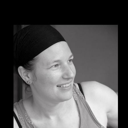
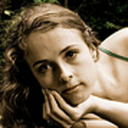
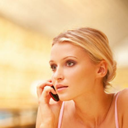
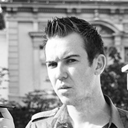
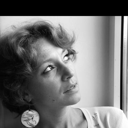
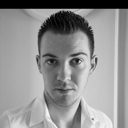
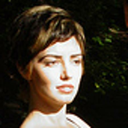
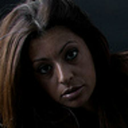
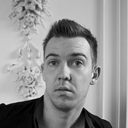
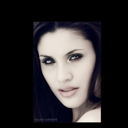

In [ ]:
tfds.as_dataframe(ds_train.take(10), info)

In [ ]:
ds

[<PrefetchDataset element_spec={'image': TensorSpec(shape=(450, 450, 3), dtype=tf.uint8, name=None), 'landmarks_68_3d_xy_normalized': TensorSpec(shape=(68, 2), dtype=tf.float32, name=None), 'landmarks_68_3d_z': TensorSpec(shape=(68, 1), dtype=tf.float32, name=None)}>,
 <PrefetchDataset element_spec={'image': TensorSpec(shape=(450, 450, 3), dtype=tf.uint8, name=None), 'landmarks_68_3d_xy_normalized': TensorSpec(shape=(68, 2), dtype=tf.float32, name=None), 'landmarks_68_3d_z': TensorSpec(shape=(68, 1), dtype=tf.float32, name=None)}>]

In [ ]:
def pre_dataset(ds):
    
  # experimental trick for conversion
    ds = list(ds)
    images = []
    landmarks = []
    for sample in ds :
        images.append(sample["image"])
        landmarks.append(sample["landmarks_68_3d_xy_normalized"])
    
    # resizing images
    images = tf.image.resize(images, (128,128))
    
    # conversion to np-arrays that can be used to form TF-friendly datasets
    images = np.array(images)
    landmarks = np.array(landmarks)
    landmarks = np.reshape(landmarks, (landmarks.shape[0], 68*2))
    
    # returning a supervised dataset (image -> landmarks)
    return tf.data.Dataset.from_tensor_slices((images, landmarks))

train = pre_dataset(train)
test = pre_dataset(test)
train

<TensorSliceDataset element_spec=(TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(136,), dtype=tf.float32, name=None))>

In [ ]:
def normalize_image(image, landmarks):
    return tf.cast(image, tf.float32) / 255., landmarks

train = train.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train = train.cache()
train = train.shuffle(1900)
train = train.batch(16)
train = train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
test = test.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = test.batch(16)
test = test.cache()
test = test.prefetch(tf.data.experimental.AUTOTUNE)

In [2]:
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization
from keras.layers.core.flatten import Flatten

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img

In [ ]:
from keras.layers.core.flatten import Flatten
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid',strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid',strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid',strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid',strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid',strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid',strides=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1), strides=(2, 2), padding='valid'))
    
model.add(Conv2D(256, kernel_size=(3, 3), padding='valid',strides=(1, 1), activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(68*2, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
optimizer = keras.optimizers.Adam(0.01)
metrics = [tf.keras.metrics.MeanSquaredError()] 
loss_object = keras.losses.mean_squared_error
model.compile(optimizer, loss_object, metrics)

Let's evaluate the model by learning a few epochs :

In [ ]:
history = model.fit(ds_train, epochs=30, validation_data=ds_test)

Epoch 1/30
113/113 [==============================] - 19s 42ms/step - loss: 0.3118 - mean_squared_error: 0.3118 - val_loss: 2.6371 - val_mean_squared_error: 2.6371
Epoch 2/30
113/113 [==============================] - 2s 21ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0813 - val_mean_squared_error: 0.0813
Epoch 3/30
113/113 [==============================] - 2s 20ms/step - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 4/30
113/113 [==============================] - 2s 20ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 5/30
113/113 [==============================] - 2s 20ms/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 6/30
113/113 [==============================] - 2s 20ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 7/30
113/113 [=

In [ ]:
model.save('cuoiki.h5')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/cuoiki.h5')

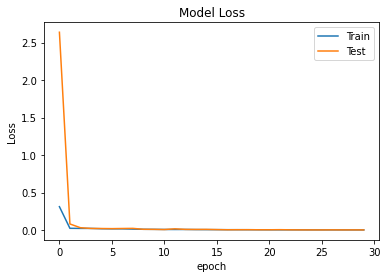

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

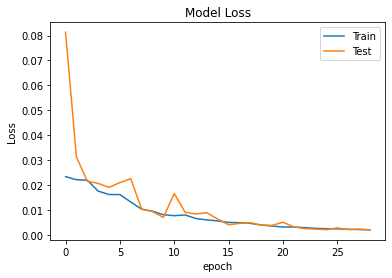

In [ ]:
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

We can see that the loss decreases over epochs and there is no evidence of overfitting. However, there is a huge loss gap between the first and the second epoch, we should plot the loss function from this one.

In [ ]:
history = model.fit(ds_train, epochs=50, validation_data=ds_test)
optimizer.lr.assign(0.001)
history = model.fit(ds_train, epochs=50, validation_data=ds_test)
optimizer.lr.assign(0.001)
history = model.fit(ds_train, epochs=50, validation_data=ds_test)
optimizer.lr.assign(0.001)

Epoch 1/50
113/113 [==============================] - 3s 28ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 2/50
113/113 [==============================] - 2s 21ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 3/50
113/113 [==============================] - 2s 21ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 4/50
113/113 [==============================] - 2s 21ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 5/50
113/113 [==============================] - 2s 21ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 6/50
113/113 [==============================] - 2s 21ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 7/50
113/113 [==

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.001>

In [ ]:
from google.colab import drive
model.save('landmark_final.h5')
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Colab Notebooks/landmark_final.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
model5 = load_model('/content/drive/MyDrive/Colab Notebooks/landmark_final.h5')

In [5]:
def detector(source):
  # load the image
  img = cv2.imread(source)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_n = cv2.resize(img, (128, 128))
  img_n = (img_n/255)
  img_n = img_n.astype('float32')
  img_n = np.expand_dims(img_n, axis=0)

  prediction = model5.predict(img_n)[0,:]
  l_x = []
  l_y = []
  for i in range(prediction.shape[0]):
    if (i%2 == 0):
      l_x.append(prediction[i])
    else:
      l_y.append(prediction[i])
  l_x = np.array(l_x)
  l_y = np.array(l_y)

  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.scatter(l_x*img.shape[0], l_y*img.shape[1], s=3)
  plt.axis('square')
  plt.xlim(0,img.shape[0])
  plt.ylim(0,img.shape[1])
  plt.gca().invert_yaxis()
  plt.show()

  return prediction

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


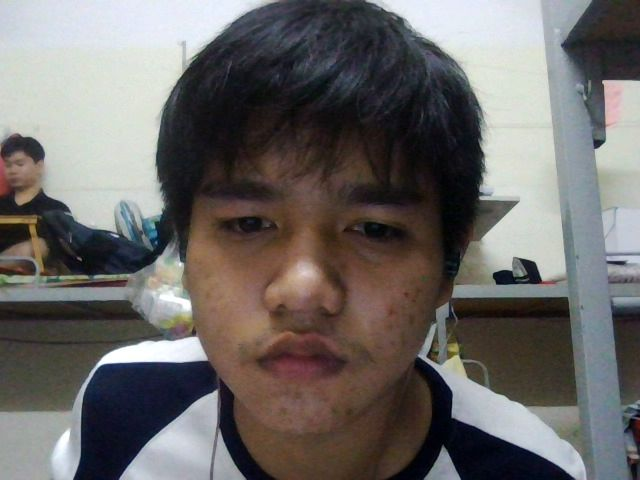

In [ ]:

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

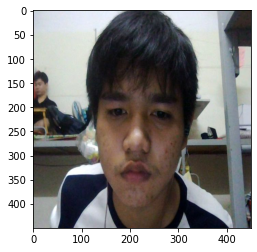

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open("photo.jpg").resize( ( 450 , 450 ) )
image_arr = plt.imshow(image)
from google.colab import files
plt.savefig("photo.jpg")
files.download("photo.jpg") 


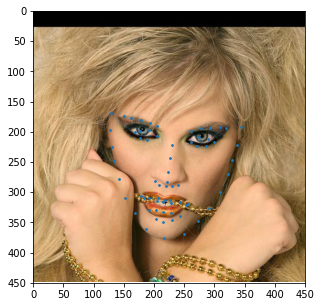

In [ ]:
predict = detector('/content/image00002.jpg')

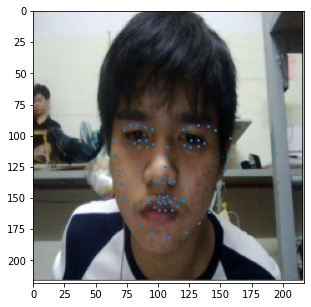

In [ ]:
predict = detector('/content/hoatumlum.jpg')

In [13]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 450, 450);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 450; //video.videoWidth;
      captureCanvas.height = 450; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

/content


<IPython.core.display.Javascript object>

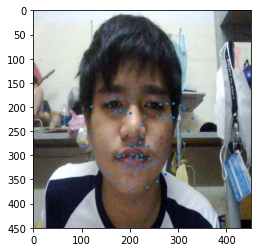

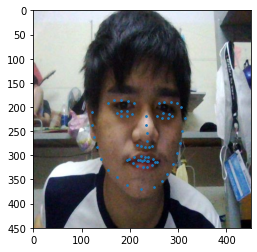

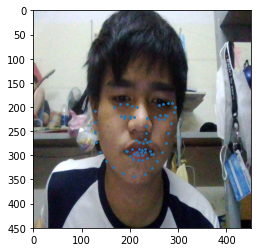

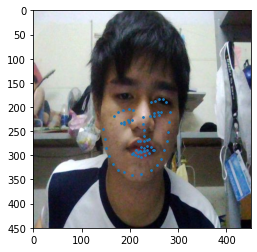

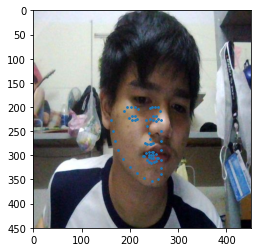

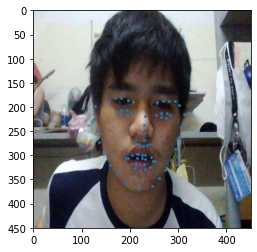

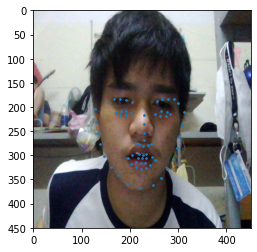

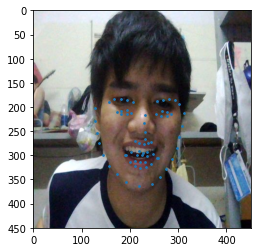

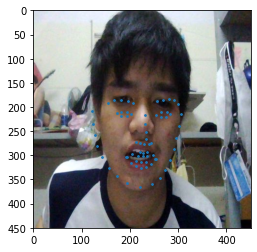

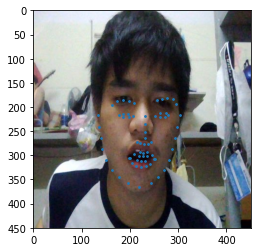

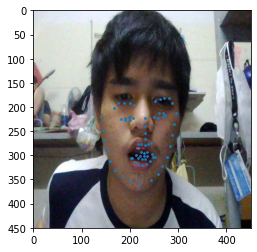

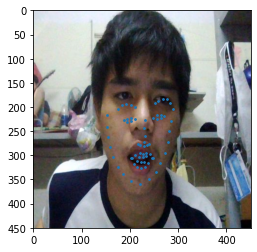

KeyboardInterrupt: ignored

In [17]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

video_stream()
# label for video
label_html = 'Image Taken...'
# initialze bounding box to empty
bbox = ''
count = 0 

model_file_path = "/content/drive/MyDrive/Colab Notebooks/landmark_final.h5"
vggmodel = load_model(model_file_path)

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_n = cv2.resize(img, dsize=(128,128))
    img_n = (img_n/255)
    img_n = img_n.astype('float32')
    tensor = np.expand_dims(img_n, axis=0)

    model5= load_model('/content/drive/MyDrive/Colab Notebooks/landmark_final.h5')
    img_n = np.expand_dims(img_n, axis=0)

    prediction = model5.predict(img_n)[0,:]
    l_x = []
    l_y = []
    for i in range(prediction.shape[0]):
      if (i%2 == 0):
        l_x.append(prediction[i])
      else:
        l_y.append(prediction[i])
    l_x = np.array(l_x)
    l_y = np.array(l_y)

    plt.imshow(img)
    plt.scatter(l_x*img.shape[0], l_y*img.shape[1], s=3)
    plt.axis('square')
    plt.xlim(0,img.shape[0])
    plt.ylim(0,img.shape[1])
    plt.gca().invert_yaxis()
    plt.show()